In [1]:
import sqlite3
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from clustergram import Clustergram
import urbangrammar_graphics as ugg
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes

In [2]:
conn = sqlite3.connect('shop_database.db')

In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [5]:
tables = cursor.fetchall()

In [6]:
tables

[('purchases',), ('personal_data_coeffs',), ('personal_data',)]

In [7]:
from sqlalchemy import create_engine

In [8]:

# Создание подключения к базе данных SQLite с помощью SQLAlchemy
engine = create_engine('sqlite:///shop_database.db')

# Выберите нужную таблицу (замените 'your_table_name' на фактическое имя таблицы)
table_name = 'purchases'  # Замените на правильное имя таблицы

# Загрузка данных из таблицы в DataFrame
df1 = pd.read_sql_table(table_name, con=engine)

df1.head()

,id,product,colour,cost,product_sex,base_sale,dt
0,0,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7
1,0,Стол Outventure,зелёный,1499,NaN,0,37
2,0,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37
3,3,Бутсы мужские GSD Astro,белый,1599,1.0,0,13
4,3,Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...,мультицвет,7199,NaN,0,27


In [9]:

# Создание подключения к базе данных SQLite с помощью SQLAlchemy
engine = create_engine('sqlite:///shop_database.db')

# Выберите нужную таблицу (замените 'your_table_name' на фактическое имя таблицы)
table_name = 'personal_data_coeffs'  # Замените на правильное имя таблицы

# Загрузка данных из таблицы в DataFrame
df2 = pd.read_sql_table(table_name, con=engine)

df2.head()

,id,lbt_coef,ac_coef,sm_coef,personal_coef
0,0,5.078678,-0.307147,0.959027,0.5072
1,3,7.764766,-0.030225,0.794720,0.4304
2,4,4.569378,0.063693,0.820892,0.5072
3,6,8.150379,0.075200,0.836140,0.4304
4,7,5.188231,-0.000134,0.944113,0.5072


In [10]:

# Создание подключения к базе данных SQLite с помощью SQLAlchemy
engine = create_engine('sqlite:///shop_database.db')

# Выберите нужную таблицу (замените 'your_table_name' на фактическое имя таблицы)
table_name = 'personal_data'  # Замените на правильное имя таблицы

# Загрузка данных из таблицы в DataFrame
df3 = pd.read_sql_table(table_name, con=engine)

df3

,id,gender,age,education,city,country
0,0,0,36,среднее,1201,32
1,4,0,35,среднее,1134,32
2,6,1,52,среднее,1188,32
3,7,0,37,среднее,1198,32
4,9,0,48,среднее,1134,32
...,...,...,...,...,...,...
89236,177997,0,28,среднее,1134,32
89237,177998,0,32,среднее,1201,32
89238,177999,1,34,среднее,1163,32
89239,178001,1,5,среднее,1208,32


==============================Классификация==========================================

In [11]:
df11=pd.read_csv('personal_data.csv.gz')

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [13]:
label_encoder = LabelEncoder()
df3['education'] = label_encoder.fit_transform(df3['education'])
df11['education'] = label_encoder.fit_transform(df11['education'])

In [14]:
df3

,id,gender,age,education,city,country
0,0,0,36,1,1201,32
1,4,0,35,1,1134,32
2,6,1,52,1,1188,32
3,7,0,37,1,1198,32
4,9,0,48,1,1134,32
...,...,...,...,...,...,...
89236,177997,0,28,1,1134,32
89237,177998,0,32,1,1201,32
89238,177999,1,34,1,1163,32
89239,178001,1,5,1,1208,32


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Подготовка данных для обучения
X = df3.drop(columns=['id', 'gender'])
y = df3['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели логистической регрессии на тренировочном наборе данных с кросс-валидацией
log_reg_model = LogisticRegression(C=50, solver='newton-cg')
cross_val_scores = cross_val_score(log_reg_model, X_train_scaled, y_train, cv=5, scoring='f1')
print("Cross-validation scores:", cross_val_scores)

# Обучение модели на тренировочном наборе данных
log_reg_model.fit(X_train_scaled, y_train)

# Оценка точности модели на тренировочном наборе данных
y_train_pred = log_reg_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(f'Accuracy on training set: {train_accuracy}')
print(f'F1-score on training set: {train_f1}')

# Оценка точности модели на тестовом наборе данных
y_pred = log_reg_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
print(f'Accuracy on test set: {test_accuracy}')
print(f'F1-score on test set: {test_f1}')

# Обучение модели на всех данных из df3
X_full = df3.drop(columns=['id', 'gender'])
y_full = df3['gender']
X_full_scaled = scaler.fit_transform(X_full)
log_reg_model.fit(X_full_scaled, y_full)

# Подготовка данных для предсказания на df11
X_df11 = df11.drop(columns=['id'])
X_df11_scaled = scaler.transform(X_df11)

# Предсказание на данных df11
predictions = log_reg_model.predict(X_df11_scaled)

# Добавление предсказаний к df11
df11['gender'] = predictions

Cross-validation scores: [0.71822443 0.71744021 0.72205025 0.72598896 0.72283328]
Accuracy on training set: 0.5727672568354998
F1-score on training set: 0.7214037138864278
Accuracy on test set: 0.5679870020729453
F1-score on test set: 0.7172039461620273


D:\Users\Prokofiy\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [16]:
df11

,id,age,education,city,country,gender
0,101492,32,1,1188,32,1
1,42690,20,0,1134,32,1
2,113001,27,1,1187,32,1
3,163654,49,0,1160,32,1
4,69523,44,1,1137,32,1
...,...,...,...,...,...,...
15743,135183,44,1,1134,32,1
15744,125993,46,1,1134,32,1
15745,167019,71,1,1134,32,0
15746,116355,32,1,1188,32,1


In [17]:
df3 = pd.concat([df3, df11], ignore_index=True)

In [18]:
df3

,id,gender,age,education,city,country
0,0,0,36,1,1201,32
1,4,0,35,1,1134,32
2,6,1,52,1,1188,32
3,7,0,37,1,1198,32
4,9,0,48,1,1134,32
...,...,...,...,...,...,...
104984,135183,1,44,1,1134,32
104985,125993,1,46,1,1134,32
104986,167019,0,71,1,1134,32
104987,116355,1,32,1,1188,32


In [19]:
df3=df3[df3['country']==32]

In [20]:
merged_df = pd.merge(df3, df2, on='id', how='inner')

In [21]:
merged_df

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef
0,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072
1,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072
2,6,1,52,1,1188,32,8.150379,0.075200,0.836140,0.4304
3,7,0,37,1,1198,32,5.188231,-0.000134,0.944113,0.5072
4,9,0,48,1,1134,32,5.334059,-0.366793,1.223406,0.5072
...,...,...,...,...,...,...,...,...,...,...
104432,135183,1,44,1,1134,32,7.585086,-0.077493,0.672522,0.4304
104433,125993,1,46,1,1134,32,8.063351,-0.105398,0.710718,0.4304
104434,167019,0,71,1,1134,32,6.172481,0.354901,1.491271,0.5072
104435,116355,1,32,1,1188,32,7.084163,-0.132395,0.509138,0.4304


In [22]:
df = pd.merge(merged_df, df1, on='id', how='inner')

In [23]:
df

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7
1,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,NaN,0,37
2,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37
3,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,NaN,0,0
4,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780112,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Поло мужское Outventure,синий,1599,1.0,0,24
780113,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Babolat Complete Muscle,оранжевый/синий,3899,1.0,0,24
780114,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Protest Prtihiaka,белый/принт,1679,1.0,1,49
780115,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Массажер Demix,темно-зелёный,399,NaN,0,52


<Axes: >

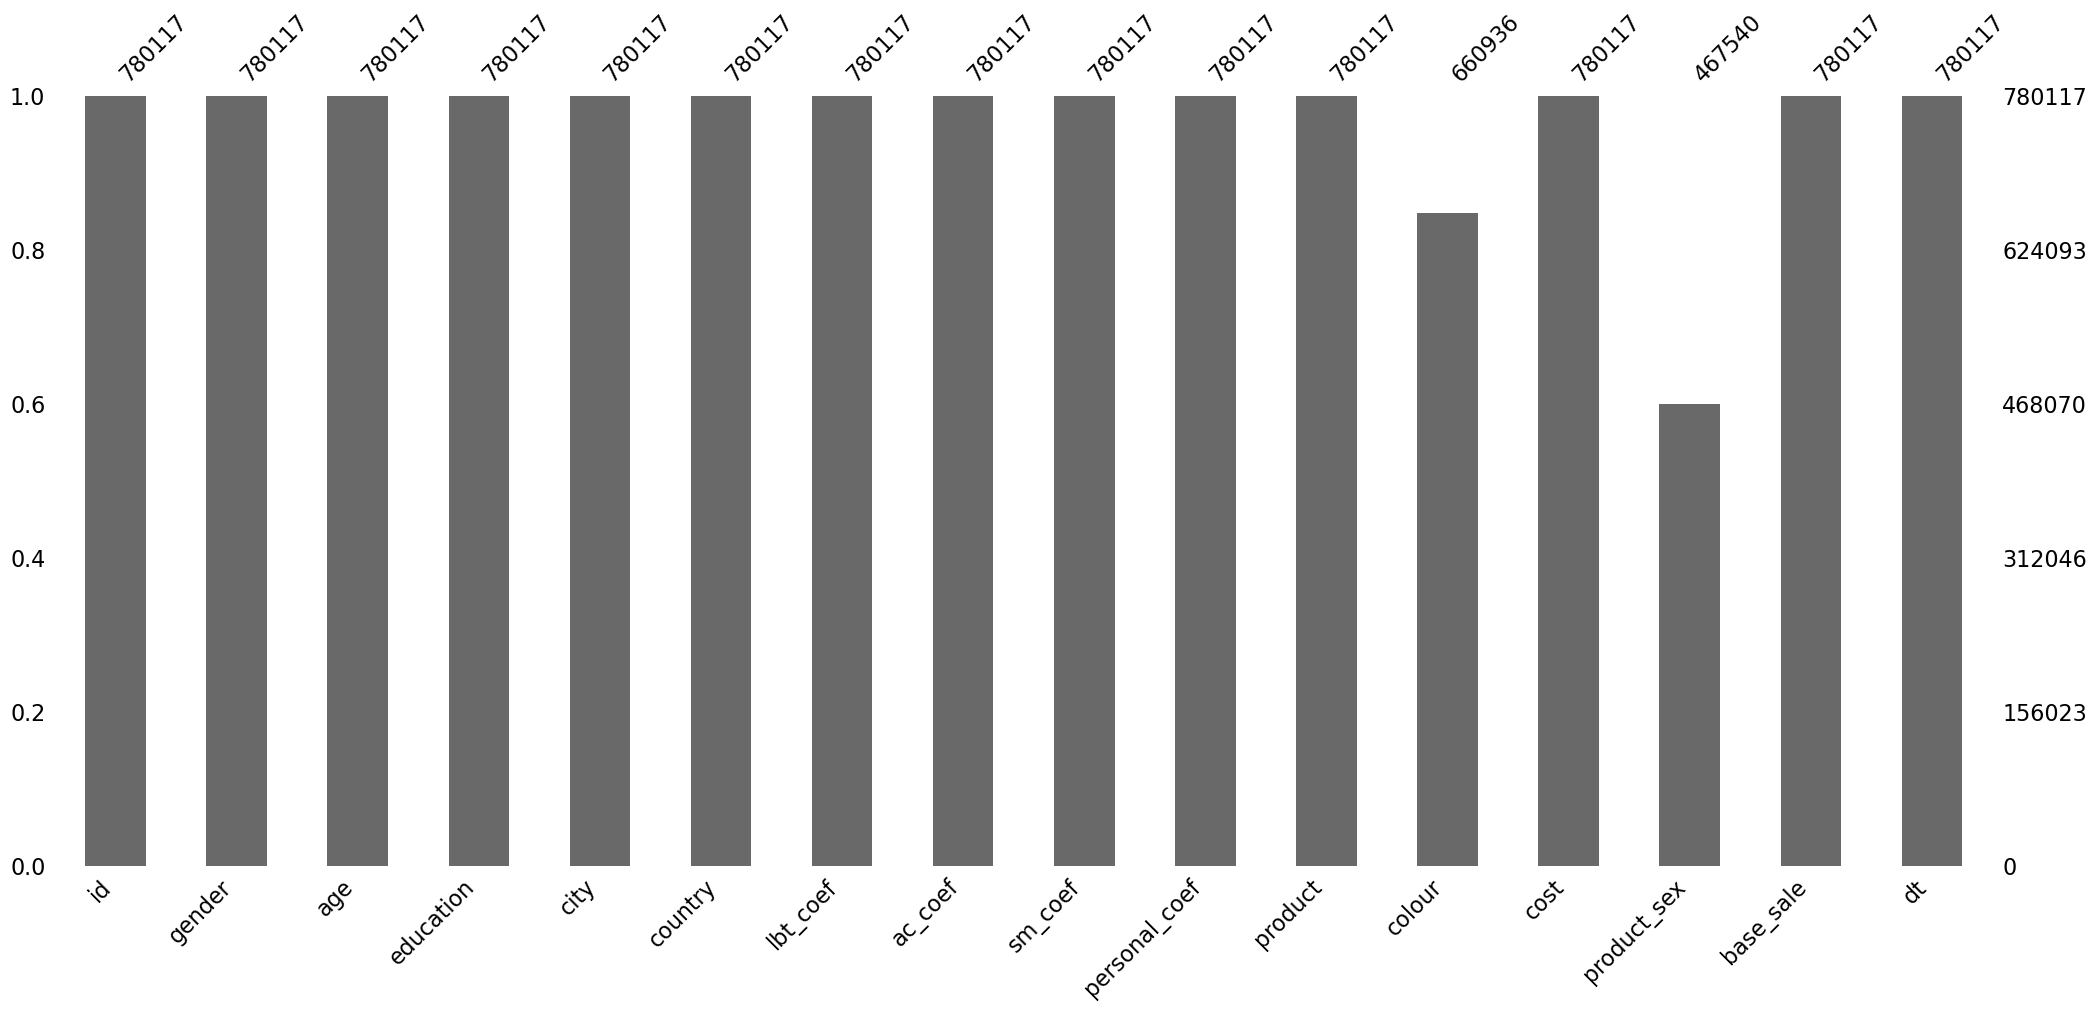

In [24]:
msno.bar(df)

<Axes: >

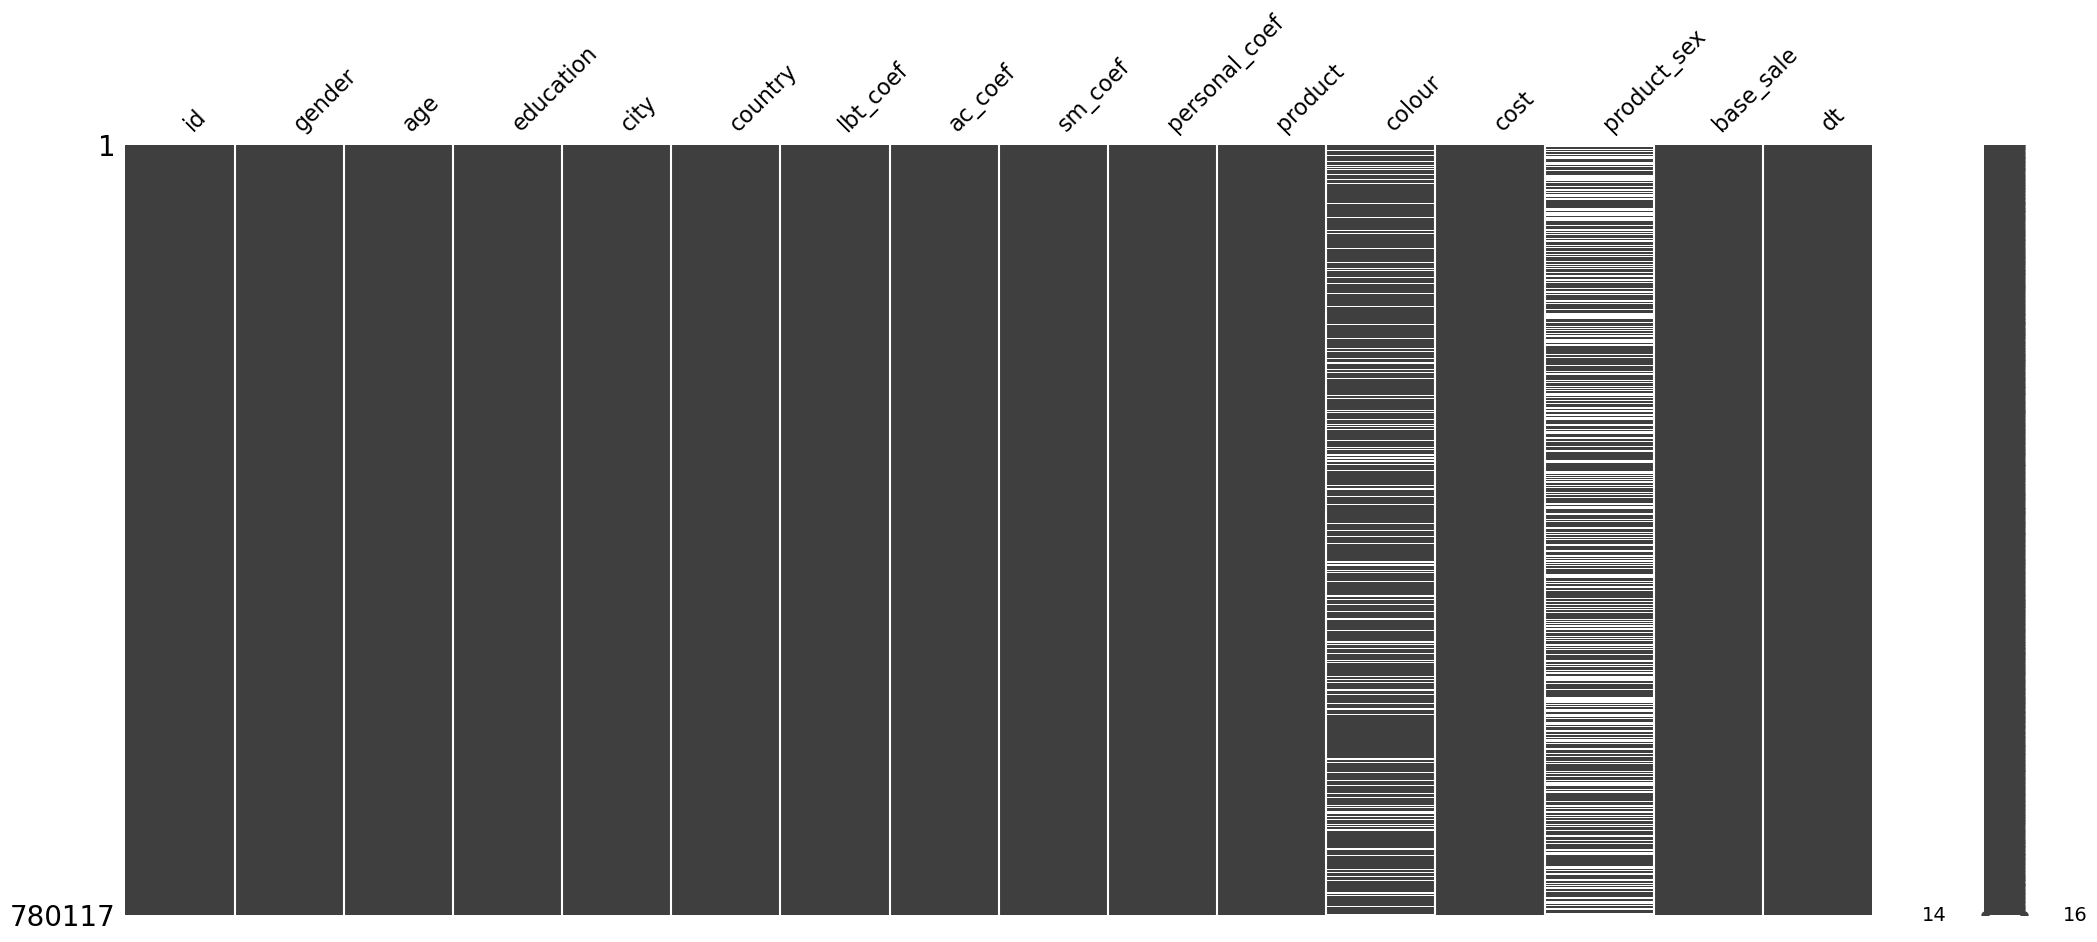

In [25]:
msno.matrix(df)

In [26]:
df.colour.value_counts()

colour
черный                      130303
белый                        42146
чёрный                       36655
синий                        34972
темно-синий                  26992
                             ...  
серый/красный/розовый            1
синий/салатовый/голубой          1
белый/фиолетовый/зеленый         1
RBS                              1
черный/коралловый/серый          1
Name: count, Length: 1690, dtype: int64

In [27]:
df.product_sex.value_counts()

product_sex
1.0    269392
0.0    198148
Name: count, dtype: int64

## Попытки использовать алгоритмы машинного обучения для заполнения пропусков в строке colour дают плохую точность поэтому используем ручное заполнение + в случае добавления переменной product часть меток содержащаеся в обучаующей выборке не содержится в тестовой

In [28]:
df[df['colour'].isna()]

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
9,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Куртка утепленная для девочек Outventure,None,2999,NaN,0,32
23,6,1,52,1,1188,32,8.150379,0.075200,0.836140,0.4304,Ботинки утепленные для мальчиков Reima Uskallus,None,3449,NaN,0,30
37,7,0,37,1,1198,32,5.188231,-0.000134,0.944113,0.5072,Бутсы для мальчиков Nike Jr. Tiempo Legend 9 A...,None,8799,NaN,0,49
48,11,0,39,1,1190,32,5.003414,0.234669,0.765311,0.5072,Сандалии женские Outventure Aqua,None,1599,0.0,0,4
50,11,0,39,1,1190,32,5.003414,0.234669,0.765311,0.5072,Рюкзак детский Demix,None,799,NaN,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780088,135183,1,44,1,1134,32,7.585086,-0.077493,0.672522,0.4304,Кроссовки мужские Demix Honor MID WTR M,None,2499,1.0,0,57
780092,125993,1,46,1,1134,32,8.063351,-0.105398,0.710718,0.4304,Шорты мужские Protest,None,1499,1.0,0,32
780093,125993,1,46,1,1134,32,8.063351,-0.105398,0.710718,0.4304,Кроссовки мужские adidas Ultimashow,None,4479,1.0,0,39
780094,125993,1,46,1,1134,32,8.063351,-0.105398,0.710718,0.4304,Шапка Northland,None,599,NaN,0,53


In [29]:
df.colour=df.colour.fillna('черный')

<Axes: >

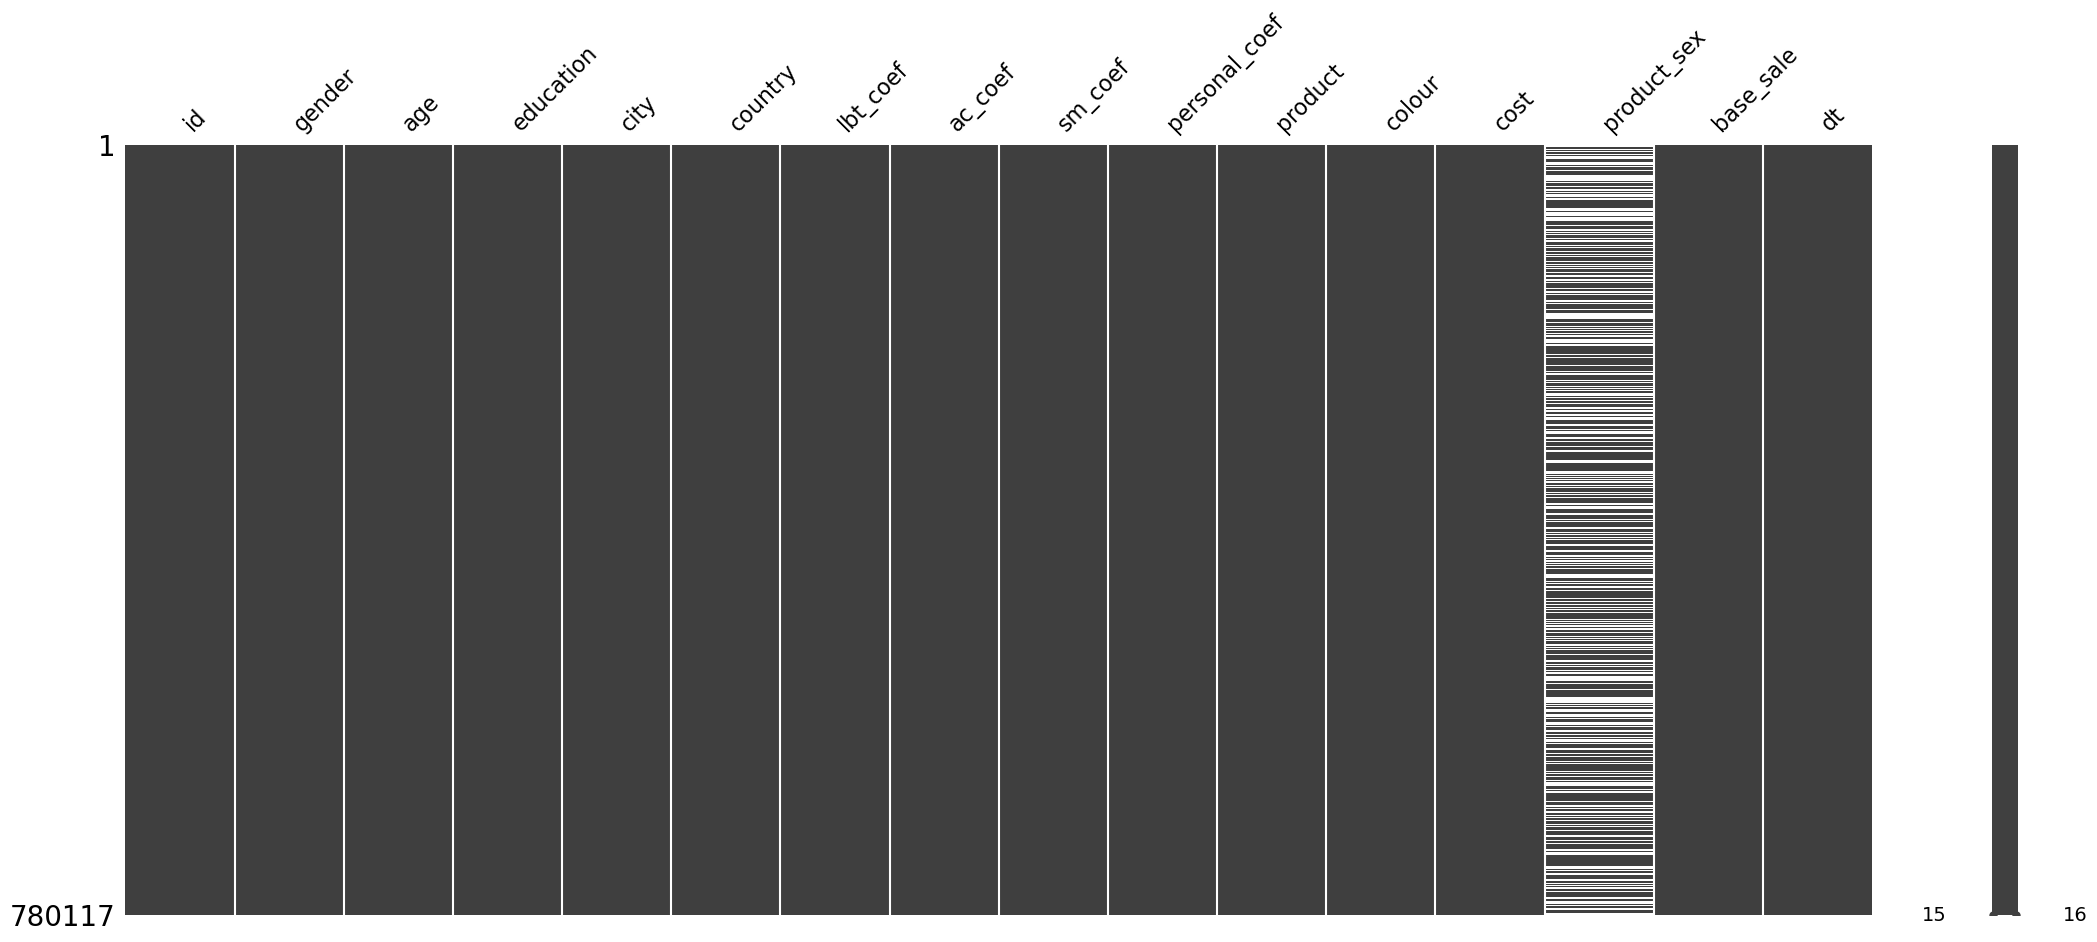

In [30]:
msno.matrix(df)

In [31]:
df

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7
1,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,NaN,0,37
2,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37
3,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,NaN,0,0
4,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780112,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Поло мужское Outventure,синий,1599,1.0,0,24
780113,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Babolat Complete Muscle,оранжевый/синий,3899,1.0,0,24
780114,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Protest Prtihiaka,белый/принт,1679,1.0,1,49
780115,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Массажер Demix,темно-зелёный,399,NaN,0,52


In [32]:
df[df['product_sex'].isna()]

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
1,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,NaN,0,37
2,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37
3,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,NaN,0,0
4,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,NaN,0,0
5,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Yuma TIF,мультицвет,6999,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780100,116355,1,32,1,1188,32,7.084163,-0.132395,0.509138,0.4304,"Велосипед горный Trek Marlin 6 29"", 2022",черный,69999,NaN,0,10
780104,116355,1,32,1,1188,32,7.084163,-0.132395,0.509138,0.4304,Костюм-сауна Everlast,чёрный,4299,NaN,0,23
780108,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Бейсболка Columbia Mesh Snap Back - High,серый,1999,NaN,0,3
780115,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Массажер Demix,темно-зелёный,399,NaN,0,52


In [33]:
df['product_sex'] = df['product'].apply(
    lambda x: 4 if 'детск' in x else (1 if 'мальч' in x or 'мужск' in x else (0 if 'женск' in x or 'дев' in x else None))
)

In [34]:
df.head(30)

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7
1,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,NaN,0,37
2,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37
3,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,4.0,0,0
4,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,NaN,0,0
5,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Yuma TIF,мультицвет,6999,4.0,0,1
6,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Набор защиты из 3-х предметов детский Reaction...,белый/серый,999,4.0,0,1
7,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем для девочек Reaction Urban,розовый,1499,0.0,0,2
8,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские раздвижные Reaction R...,серый/розовый,4399,4.0,0,2
9,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Куртка утепленная для девочек Outventure,черный,2999,0.0,0,32


In [35]:
df1=df[df['product_sex'
].isna()]

In [36]:
df1['product'].value_counts()

product
Сабо Crocs Crocband                                      2201
Рюкзак Demix                                             1894
Кресло кемпинговое Outventure                            1698
Сумка FILA                                               1684
Солнцезащитные очки Kappa                                1607
                                                         ... 
Велосипед городской Trek Dual Sport 3 700C                  1
SUP надувной Koetsu mint 10'6                               1
Пропитка Saphir INVULNER, РЕКЛАМНАЯ, 300мл. (neutral)       1
Дезодорант Saphir MENTHOL, 200мл.                           1
Удилище Okuma Aventa Tele Spin 350cm up to 120g 7sec        1
Name: count, Length: 10408, dtype: int64

In [37]:
value_counts_dict = df1['product'].value_counts().to_dict()
print("Value counts as dictionary:")
print(value_counts_dict)

Value counts as dictionary:
{'Сабо Crocs Crocband': 2201, 'Рюкзак Demix': 1894, 'Кресло кемпинговое Outventure': 1698, 'Сумка FILA': 1684, 'Солнцезащитные очки Kappa': 1607, 'Сумка Demix': 1458, 'Рюкзак FILA': 1436, 'Худи FILA': 1420, 'Солнцезащитные очки Polaroid': 1283, 'Спортивный топ бра Demix': 1173, 'Солнцезащитные очки Demix': 983, 'Коврик пенный Outventure': 968, 'Носки FILA, 3 пары': 915, 'Палатка 2-местная Outventure Dome 2': 870, 'Носки Wilson, 2 пары': 866, 'Бейсболка Demix': 843, 'Набор посуды Northland': 822, 'Носки Demix, 3 пары': 816, 'Бейсболка FILA': 779, 'Стол Outventure': 748, 'Рюкзак Skechers': 713, 'Свитшот FILA': 676, 'Шапочка для плавания Joss': 655, 'Шлепанцы Joss Joy': 617, 'Набор Outventure: стол + 4 стула': 588, 'Сумка на пояс Demix': 574, 'Бейсболка Kappa': 568, 'Палатка 3-местная Outventure Cadaques 3': 541, 'Бейсболка Outventure': 540, 'Палатка 2-местная Outventure Monodome 2': 524, 'Коврик для фитнеса Demix': 522, 'Шлем велосипедный Stern': 519, 'Мяч фут

In [38]:
for i in value_counts_dict:
    print(i)

Сабо Crocs Crocband
Рюкзак Demix
Кресло кемпинговое Outventure
Сумка FILA
Солнцезащитные очки Kappa
Сумка Demix
Рюкзак FILA
Худи FILA
Солнцезащитные очки Polaroid
Спортивный топ бра Demix
Солнцезащитные очки Demix
Коврик пенный Outventure
Носки FILA, 3 пары
Палатка 2-местная Outventure Dome 2
Носки Wilson, 2 пары
Бейсболка Demix
Набор посуды Northland
Носки Demix, 3 пары
Бейсболка FILA
Стол Outventure
Рюкзак Skechers
Свитшот FILA
Шапочка для плавания Joss
Шлепанцы Joss Joy
Набор Outventure: стол + 4 стула
Сумка на пояс Demix
Бейсболка Kappa
Палатка 3-местная Outventure Cadaques 3
Бейсболка Outventure
Палатка 2-местная Outventure Monodome 2
Коврик для фитнеса Demix
Шлем велосипедный Stern
Мяч футбольный Demix
Бейсболка Columbia Mesh Snap Back - High
Футболка FILA
Велосипед горный Stern Energy 2.0 27,5"
Сидушка пенная Outventure
Тапочки коралловые Joss Auqamarine 2
Велосипед горный Denton Storm 29"
Сабо Crocs LiteRide 360 Clog
Палатка 4-местная Outventure Trenton 4
Брюки FILA
Тент Outven

In [39]:
df['product_sex'] = df['product'].apply(
    lambda x: 3 if 'детск' in x else 
              (1 if 'мальч' in x or 'мужск' in x else 
               (0 if 'женск' in x or 'дев' in x else 2))
)

In [40]:
df

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0,1,7
1,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,2,0,37
2,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,2,0,37
3,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,3,0,0
4,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780112,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Поло мужское Outventure,синий,1599,1,0,24
780113,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Babolat Complete Muscle,оранжевый/синий,3899,1,0,24
780114,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Protest Prtihiaka,белый/принт,1679,1,1,49
780115,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Массажер Demix,темно-зелёный,399,2,0,52


<Axes: >

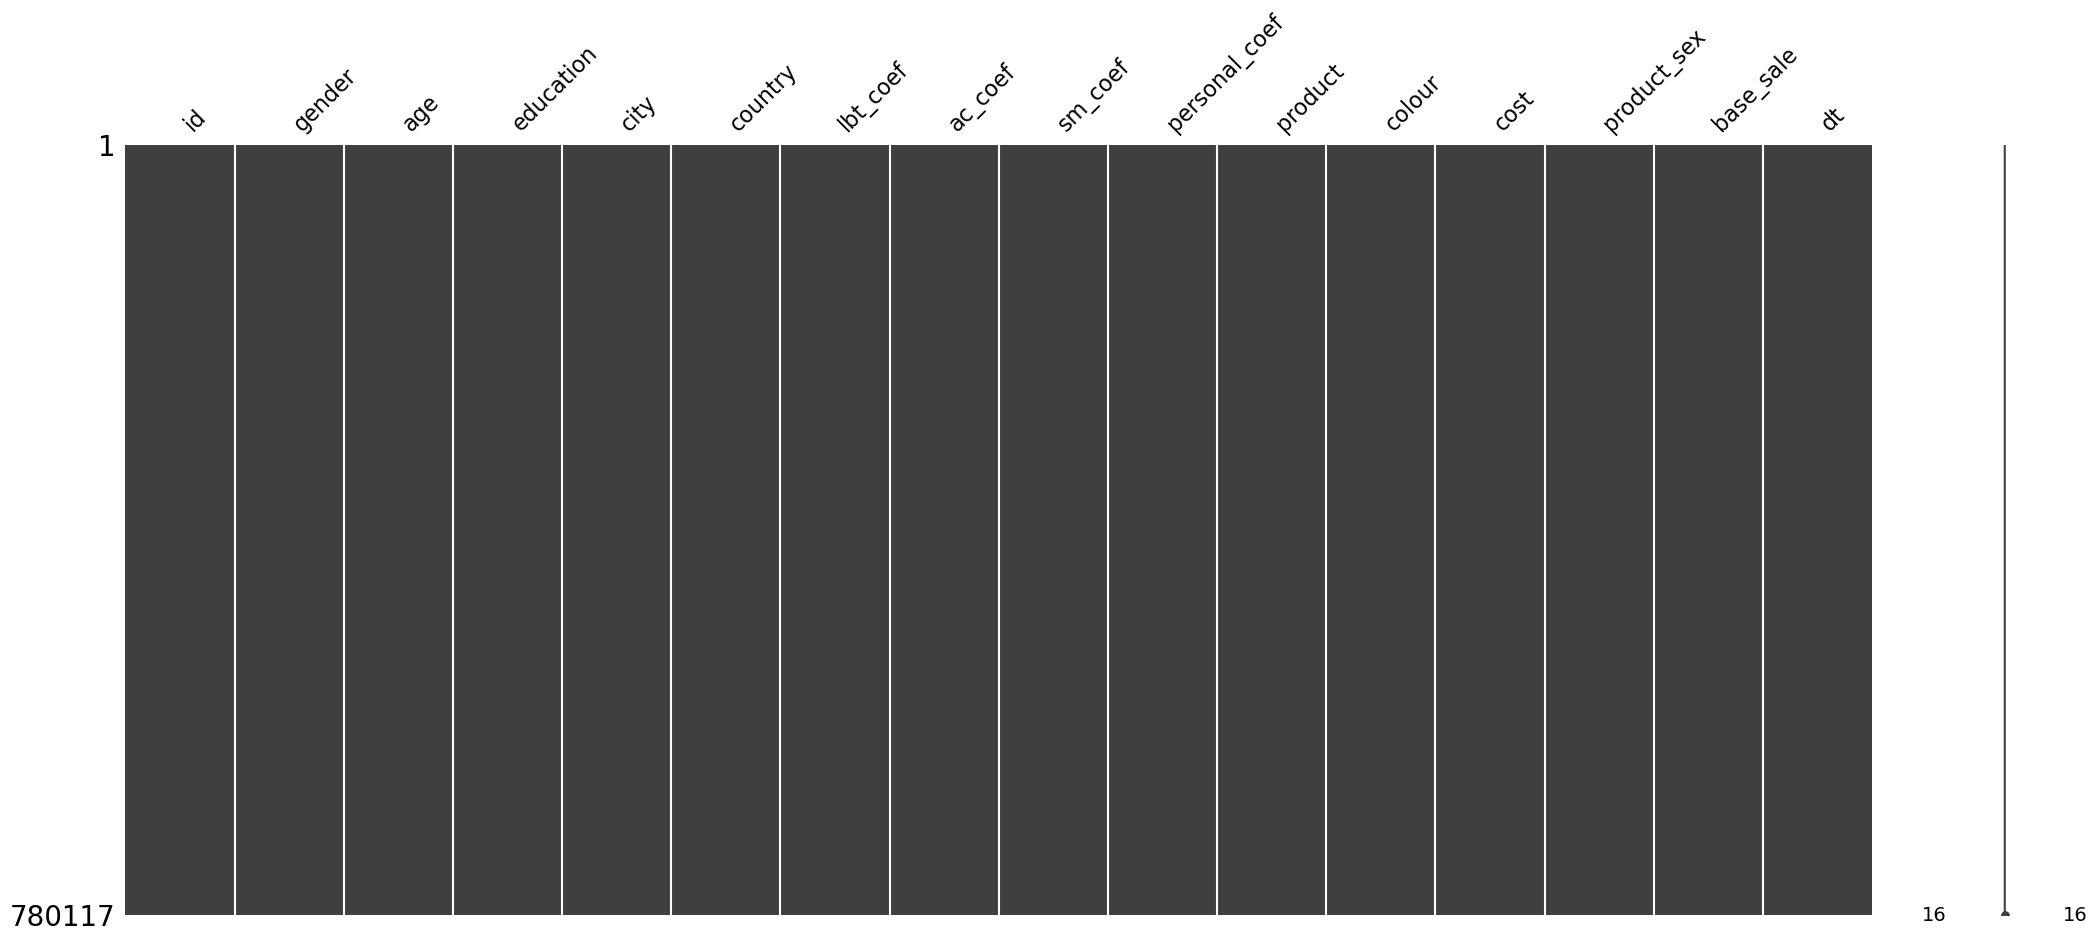

In [41]:
msno.matrix(df)

In [42]:
# посмотрим выбросы

In [43]:
# Вычисляем квартили
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

# Вычисляем интерквартильный размах
IQR = Q3 - Q1

# Находим верхнюю и нижнюю границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
outliers

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
1821,574,0,71,1,1168,32,5.756485,0.120071,1.490797,0.5072,Ботинки горнолыжные Head Edge LYT 130 GW,черный,42999,2,0,1
1845,585,1,5,1,1152,32,6.007665,-0.200491,1.248311,0.2576,Футболка женская Demix,черный,699,0,1,7
1846,585,1,5,1,1152,32,6.007665,-0.200491,1.248311,0.2576,Легинсы женские Demix,синий,1609,0,1,7
1847,585,1,5,1,1152,32,6.007665,-0.200491,1.248311,0.2576,Кеды мужские Reebok Royal Complete Cln2,белый,4799,1,1,11
1848,585,1,5,1,1152,32,6.007665,-0.200491,1.248311,0.2576,Кресло кемпинговое Outventure,бежевый,4499,2,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780095,167019,0,71,1,1134,32,6.172481,0.354901,1.491271,0.5072,Рубашка с коротким рукавом женская Termit,синий/зеленый,1999,0,0,6
780096,167019,0,71,1,1134,32,6.172481,0.354901,1.491271,0.5072,Газовый баллон Kovea,белый,699,2,0,20
780097,167019,0,71,1,1134,32,6.172481,0.354901,1.491271,0.5072,Лонгслив мужской Termit,черный,979,1,1,20
780098,167019,0,71,1,1134,32,6.172481,0.354901,1.491271,0.5072,Брюки мужские FILA,черный,2449,1,1,20


In [44]:
filtered_df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [45]:
filtered_df

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0,1,7
1,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,2,0,37
2,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,2,0,37
3,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,3,0,0
4,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780112,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Поло мужское Outventure,синий,1599,1,0,24
780113,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Babolat Complete Muscle,оранжевый/синий,3899,1,0,24
780114,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Protest Prtihiaka,белый/принт,1679,1,1,49
780115,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Массажер Demix,темно-зелёный,399,2,0,52


In [46]:
# Вычисляем квартили
Q1 = filtered_df['lbt_coef'].quantile(0.25)
Q3 = filtered_df['lbt_coef'].quantile(0.75)

# Вычисляем интерквартильный размах
IQR = Q3 - Q1

# Находим верхнюю и нижнюю границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = filtered_df[(filtered_df['lbt_coef'] < lower_bound) | (filtered_df['lbt_coef'] > upper_bound)]
outliers


,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt


In [47]:
# Вычисляем квартили
Q1 = filtered_df['ac_coef'].quantile(0.25)
Q3 = filtered_df['ac_coef'].quantile(0.75)

# Вычисляем интерквартильный размах
IQR = Q3 - Q1

# Находим верхнюю и нижнюю границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = filtered_df[(filtered_df['ac_coef'] < lower_bound) | (filtered_df['ac_coef'] > upper_bound)]
outliers


,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
436,112,1,18,0,74,32,7.157033,-3.116839,0.734838,0.2672,Слипоны мужские Skechers Bounder Vertville,черный,2999,1,0,1
437,112,1,18,0,74,32,7.157033,-3.116839,0.734838,0.2672,Шапочка для плавания женская Joss,черный/красный,899,0,0,50
438,112,1,18,0,74,32,7.157033,-3.116839,0.734838,0.2672,Слипоны мужские Skechers Bounder Vertville,синий,2999,1,1,57
731,263,0,37,1,609,32,5.455630,-0.980793,1.243467,0.5072,Худи мужская Demix,абрикосовый,2449,1,1,0
732,263,0,37,1,609,32,5.455630,-0.980793,1.243467,0.5072,Кроссовки для девочек Demix First,серый/фиолетовый,1599,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779733,84026,1,41,1,7,32,7.664935,-4.982625,0.935004,0.4304,Рюкзак Outventure Creek 80,еловый,5499,2,0,14
779734,84026,1,41,1,7,32,7.664935,-4.982625,0.935004,0.4304,"Термосумка Outventure, 35 л",сапфировый,2499,2,0,23
779735,84026,1,41,1,7,32,7.664935,-4.982625,0.935004,0.4304,Сумка для пикника Outventure на 4 человека,мультицвет,3824,2,1,46
779736,84026,1,41,1,7,32,7.664935,-4.982625,0.935004,0.4304,"Термосумка Outventure, 35 л",сапфировый,2124,2,1,46


In [48]:
filtered_df = filtered_df[(filtered_df['ac_coef'] >= lower_bound) & (filtered_df['ac_coef'] <= upper_bound)]
filtered_df

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0,1,7
1,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,2,0,37
2,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,2,0,37
3,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,3,0,0
4,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780112,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Поло мужское Outventure,синий,1599,1,0,24
780113,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Babolat Complete Muscle,оранжевый/синий,3899,1,0,24
780114,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Protest Prtihiaka,белый/принт,1679,1,1,49
780115,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Массажер Demix,темно-зелёный,399,2,0,52


In [49]:
# Вычисляем квартили
Q1 = filtered_df['sm_coef'].quantile(0.25)
Q3 = filtered_df['sm_coef'].quantile(0.75)

# Вычисляем интерквартильный размах
IQR = Q3 - Q1

# Находим верхнюю и нижнюю границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = filtered_df[(filtered_df['sm_coef'] < lower_bound) | (filtered_df['sm_coef'] > upper_bound)]
outliers


,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt


In [50]:
# Вычисляем квартили
Q1 = filtered_df['personal_coef'].quantile(0.25)
Q3 = filtered_df['personal_coef'].quantile(0.75)

# Вычисляем интерквартильный размах
IQR = Q3 - Q1

# Находим верхнюю и нижнюю границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = filtered_df[(filtered_df['personal_coef'] < lower_bound) | (filtered_df['personal_coef'] > upper_bound)]
outliers


,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
116,27,1,17,0,1137,32,6.393598,-0.054934,0.550141,0.2672,Кроссовки мужские GSD Turbo M,светло-серый,3499,1,0,4
117,27,1,17,0,1137,32,6.393598,-0.054934,0.550141,0.2672,Мяч баскетбольный Demix Triple Double 7,черный/коричневый,1399,2,0,47
259,82,1,16,0,1191,32,7.112771,0.107523,0.540592,0.2672,Кроссовки мужские ASICS Gel-Contend 7,синий/белый,7799,1,0,0
260,82,1,16,0,1191,32,7.112771,0.107523,0.540592,0.2672,Шорты мужские Nike,черный,5799,1,0,3
261,82,1,16,0,1191,32,7.112771,0.107523,0.540592,0.2672,Кроссовки мужские New Balance 327,серый,17009,1,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779849,78883,1,14,0,1147,32,6.841614,-0.138576,0.565425,0.2672,Худи мужская Reebok City League серый,меланж,7699,1,0,13
779850,78883,1,14,0,1147,32,6.841614,-0.138576,0.565425,0.2672,Брюки карго мужские ASHE cargo twill black,черный,12300,1,0,16
779851,78883,1,14,0,1147,32,6.841614,-0.138576,0.565425,0.2672,Кроссовки мужские Demix Atom 3 Smr,черный,1899,1,1,44
780025,76770,1,18,0,1188,32,4.605091,0.005129,0.516328,0.2896,Кроссовки детские Nike Star Runner 3 (GS),черный/белый,5199,3,0,11


In [51]:
filtered_df = filtered_df[(filtered_df['personal_coef'] >= lower_bound) & (filtered_df['personal_coef'] <= upper_bound)]
filtered_df

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0,1,7
1,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,2,0,37
2,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,2,0,37
3,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,3,0,0
4,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780112,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Поло мужское Outventure,синий,1599,1,0,24
780113,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Babolat Complete Muscle,оранжевый/синий,3899,1,0,24
780114,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Protest Prtihiaka,белый/принт,1679,1,1,49
780115,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Массажер Demix,темно-зелёный,399,2,0,52


In [52]:
# Вычисляем квартили
Q1 = filtered_df['cost'].quantile(0.25)
Q3 = filtered_df['cost'].quantile(0.75)

# Вычисляем интерквартильный размах
IQR = Q3 - Q1

# Находим верхнюю и нижнюю границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = filtered_df[(filtered_df['cost'] < lower_bound) | (filtered_df['cost'] > upper_bound)]
outliers

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0,1,7
17,6,1,52,1,1188,32,8.150379,0.075200,0.836140,0.4304,Куртка утепленная мужская Columbia Powder Lite...,чёрный,11999,1,0,17
18,6,1,52,1,1188,32,8.150379,0.075200,0.836140,0.4304,Кроссовки мужские Nike React Infinity Run FK 3,черный/красный/белый,23999,1,0,18
38,9,0,48,1,1134,32,5.334059,-0.366793,1.223406,0.5072,"Электросамокат Ninebot KickScooter F20A, черный",Черный,35999,2,0,6
56,12,1,44,1,1134,32,7.974965,-0.150779,0.839112,0.4304,"Велосипед горный Stern Energy 2.0 27,5""",черный/серый,26999,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780085,135183,1,44,1,1134,32,7.585086,-0.077493,0.672522,0.4304,Ботинки женские Scarpa Boreas GTX Wmn,голубой/серый,18199,0,0,13
780100,116355,1,32,1,1188,32,7.084163,-0.132395,0.509138,0.4304,"Велосипед горный Trek Marlin 6 29"", 2022",черный,69999,2,0,10
780101,116355,1,32,1,1188,32,7.084163,-0.132395,0.509138,0.4304,Кроссовки мужские adidas Multix,синий/белый,13999,1,0,17
780102,116355,1,32,1,1188,32,7.084163,-0.132395,0.509138,0.4304,Кроссовки мужские Nike Air Huarache,черный/оранжевый/белый,17599,1,0,18


In [53]:
filtered_df = filtered_df[(filtered_df['cost'] >= lower_bound) & (filtered_df['cost'] <= upper_bound)]
filtered_df

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
1,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,2,0,37
2,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,2,0,37
3,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,3,0,0
4,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,2,0,0
5,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Yuma TIF,мультицвет,6999,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780112,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Поло мужское Outventure,синий,1599,1,0,24
780113,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Babolat Complete Muscle,оранжевый/синий,3899,1,0,24
780114,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Protest Prtihiaka,белый/принт,1679,1,1,49
780115,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Массажер Demix,темно-зелёный,399,2,0,52


In [54]:
df=filtered_df

In [55]:
df

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
1,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,2,0,37
2,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,2,0,37
3,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,3,0,0
4,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,2,0,0
5,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Yuma TIF,мультицвет,6999,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780112,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Поло мужское Outventure,синий,1599,1,0,24
780113,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Babolat Complete Muscle,оранжевый/синий,3899,1,0,24
780114,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Protest Prtihiaka,белый/принт,1679,1,1,49
780115,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Массажер Demix,темно-зелёный,399,2,0,52


----------------------------------------------------------------------------------------

In [56]:
with open('ids_first_company_positive.txt', 'r', encoding='utf-8') as file:
    # Прочитать весь файл целиком
    content = file.read()

# Вывести содержимое файла
print(content)


Ids of positive AB people 88128,171960,142117,114589,146123,94080,170921,63395,113075,144095,160909,28409,564,73304,17325,157790,73503,34595,27363,93721,53448,172382,139930,125612,123890,44798,98385,101786,19213,63220,34646,16476,166187,140056,161638,107475,97026,16112,115991,124787,156828,126921,141119,115620,140837,149500,44921,85789,22927,9984,32189,76510,70726,95757,91876,66688,87987,139301,121669,158721,96365,172608,135512,9374,81980,172855,164024,24755,19656,100382,64244,164113,95935,57430,86793,146767,85744,109125,22588,18792,82490,78167,9575,80270,24922,13188,131219,135219,125439,155222,54407,112736,91207,81815,17215,136729,34887,34327,91299,147422,33146,10367,72703,146648,142790,162520,64215,53979,60330,29616,46917,94944,37777,842,173346,114329,23065,93730,95418,76520,121995,49630,35415,169037,122653,46979,127692,69577,103191,137483,138630,25626,102468,30823,142371,90951,13321,122316,42861,166060,114482,120726,77077,110314,110119,73184,130753,64033,72535,58951,76522,57385,8625

In [57]:
import re

# Ваш список
id_list = content.split(' ')[5:]

# Проходим по каждому элементу списка
for i in range(len(id_list)):
    # Проверяем, является ли элемент списком
    if isinstance(id_list[i], list):
        # Проходим по каждому элементу вложенного списка
        for j in range(len(id_list[i])):
            # Удаляем все буквы и символы \n
            id_list[i][j] = re.sub(r'[A-Za-z\n]', '', id_list[i][j])
    else:
        # Удаляем все буквы и символы \n
        id_list[i] = re.sub(r'[A-Za-z\n]', '', id_list[i])

# Удаляем пустые строки из списка
id_list = [item for item in id_list if item]

# Выводим преобразованный список
print(id_list)

['88128,171960,142117,114589,146123,94080,170921,63395,113075,144095,160909,28409,564,73304,17325,157790,73503,34595,27363,93721,53448,172382,139930,125612,123890,44798,98385,101786,19213,63220,34646,16476,166187,140056,161638,107475,97026,16112,115991,124787,156828,126921,141119,115620,140837,149500,44921,85789,22927,9984,32189,76510,70726,95757,91876,66688,87987,139301,121669,158721,96365,172608,135512,9374,81980,172855,164024,24755,19656,100382,64244,164113,95935,57430,86793,146767,85744,109125,22588,18792,82490,78167,9575,80270,24922,13188,131219,135219,125439,155222,54407,112736,91207,81815,17215,136729,34887,34327,91299,147422,33146,10367,72703,146648,142790,162520,64215,53979,60330,29616,46917,94944,37777,842,173346,114329,23065,93730,95418,76520,121995,49630,35415,169037,122653,46979,127692,69577,103191,137483,138630,25626,102468,30823,142371,90951,13321,122316,42861,166060,114482,120726,77077,110314,110119,73184,130753,64033,72535,58951,76522,57385,86254,169500,98299,23240,103

In [58]:
ids=id_list[1:]
a=id_list[0].split(',')[:-1]
b=id_list[0].split(',')[-1].split(';')

In [59]:
ids.extend(a)

In [60]:
ids.extend(b)

In [61]:
ids_pos=ids
print(len(ids_pos))

4999


In [62]:
with open('ids_first_company_negative.txt', 'r', encoding='utf-8') as file:
    # Прочитать весь файл целиком
    content = file.read()

# Вывести содержимое файла
print(content)


Ids of negative AB people 82450;63400;7138;102118;153511;168450;4985;84106;83492;117102;168054;89820;62749;169114;161437;44626;170874;145877;161411;49035;56468;62835;77474;30013;55201;137781;165566;40819;101614;10027;84201;31128;96514;77779;142592;18314;48137;71286;128063;18550;70682;33862;52972;131507;45807;64262;164130;17193;108167;18712;77602;84851;33806;18813;168271;170144;141790;113883;175059;5199;67063;141940;63783;131035;29957;25195;150669;15874;8169;45630;50600;106224;114977;140090;29442;161833;156705;145568;173736;108499;145410;144617;74871;9397;43075;59380;123287;31406;135979;43728;98303;3014;164228;75809;155457;119551;7686;147106;134089;13702;136287;38219;27306;151342;97168;151349;136909;71823;162474;54410;24733;21599;89106;99224;71567;60068;141713;157428;70764;94959;77332;33517;129256;154873;94587;43729;38884;122120;137230;173829;49659;141221;154214;44269;38789;26923;26151;38744;160298;152524;147251;8225;113396;43129;83817;26930;127937;124424;142832;137831;88209;152761;1650

In [63]:
import re

# Ваш список
id_list = content.split(' ')[5:]

# Проходим по каждому элементу списка
for i in range(len(id_list)):
    # Проверяем, является ли элемент списком
    if isinstance(id_list[i], list):
        # Проходим по каждому элементу вложенного списка
        for j in range(len(id_list[i])):
            # Удаляем все буквы и символы \n
            id_list[i][j] = re.sub(r'[A-Za-z\n]', '', id_list[i][j])
    else:
        # Удаляем все буквы и символы \n
        id_list[i] = re.sub(r'[A-Za-z\n]', '', id_list[i])

# Удаляем пустые строки из списка
id_list = [item for item in id_list if item]

# Выводим преобразованный список
print(id_list)

['82450;63400;7138;102118;153511;168450;4985;84106;83492;117102;168054;89820;62749;169114;161437;44626;170874;145877;161411;49035;56468;62835;77474;30013;55201;137781;165566;40819;101614;10027;84201;31128;96514;77779;142592;18314;48137;71286;128063;18550;70682;33862;52972;131507;45807;64262;164130;17193;108167;18712;77602;84851;33806;18813;168271;170144;141790;113883;175059;5199;67063;141940;63783;131035;29957;25195;150669;15874;8169;45630;50600;106224;114977;140090;29442;161833;156705;145568;173736;108499;145410;144617;74871;9397;43075;59380;123287;31406;135979;43728;98303;3014;164228;75809;155457;119551;7686;147106;134089;13702;136287;38219;27306;151342;97168;151349;136909;71823;162474;54410;24733;21599;89106;99224;71567;60068;141713;157428;70764;94959;77332;33517;129256;154873;94587;43729;38884;122120;137230;173829;49659;141221;154214;44269;38789;26923;26151;38744;160298;152524;147251;8225;113396;43129;83817;26930;127937;124424;142832;137831;88209;152761;165030;53388;103852;84418;15

In [64]:
ids_neg=id_list[1:]
ids_neg
# Создаем копию списка для безопасного изменения
ids_neg_copy = ids_neg.copy()

# Проходим по копии списка
for item in ids_neg_copy:
    # Если в элементе есть запятая
    if ',' in item:
        # Разбиваем элемент по запятой и добавляем все полученные элементы в конец списка
        ids_neg.extend(item.split(','))
        # Удаляем текущий элемент
        ids_neg.remove(item)


In [65]:

for i in ids_neg:
    print(i)

175296
53040
161656
117189
90096
73280
60189
121734
133352
130084
129231
6319
126976
118255
153424
18001
13953
37086
127249
128717
163401
37234
50575
138499
19640
177015
125379
91214
107483
107755
116911
85929
7189
133523
11558
39716
99452
66113
150188
144116
84279
137316
156302
47585
13633
117059
42994
97836
152961
130144
109054
173874
165606
664
85906
151211
33445
157387
42069
171548
39839
20563
128673
120625
36762
158811
87674
86309
104517
147399
127784
33805
46636
3359
148434
140504
52485
164424
127291
31003
140587
76305
41389
134394
93262
105869
76674
133587
82035
85706
50404
73718
159189
61823
110290
1760
161855
148795
110752
55179
139473
95364
107022
129665
106150
99775
145821
76343
107077
43560
91441
65516
26820
12987
26868
55618
159045
132041
79089
42146
108658
142667
177762
167344
161804
47542
81608
43775
118374
53750
133043
86801
165954
5935
27286
133885
149767
107243
53036
174059
139753
139970
32811
173943
113221
139915
133444
36529
2865
171179
164921
1798
172598
56351
3359

In [66]:
ids_neg=ids_neg[:-1]
for i in ids_neg:
    print(i)

175296
53040
161656
117189
90096
73280
60189
121734
133352
130084
129231
6319
126976
118255
153424
18001
13953
37086
127249
128717
163401
37234
50575
138499
19640
177015
125379
91214
107483
107755
116911
85929
7189
133523
11558
39716
99452
66113
150188
144116
84279
137316
156302
47585
13633
117059
42994
97836
152961
130144
109054
173874
165606
664
85906
151211
33445
157387
42069
171548
39839
20563
128673
120625
36762
158811
87674
86309
104517
147399
127784
33805
46636
3359
148434
140504
52485
164424
127291
31003
140587
76305
41389
134394
93262
105869
76674
133587
82035
85706
50404
73718
159189
61823
110290
1760
161855
148795
110752
55179
139473
95364
107022
129665
106150
99775
145821
76343
107077
43560
91441
65516
26820
12987
26868
55618
159045
132041
79089
42146
108658
142667
177762
167344
161804
47542
81608
43775
118374
53750
133043
86801
165954
5935
27286
133885
149767
107243
53036
174059
139753
139970
32811
173943
113221
139915
133444
36529
2865
171179
164921
1798
172598
56351
3359

In [67]:
ids_neg.extend([98626,64167])

In [68]:
for i in ids_neg:
    print(i)

175296
53040
161656
117189
90096
73280
60189
121734
133352
130084
129231
6319
126976
118255
153424
18001
13953
37086
127249
128717
163401
37234
50575
138499
19640
177015
125379
91214
107483
107755
116911
85929
7189
133523
11558
39716
99452
66113
150188
144116
84279
137316
156302
47585
13633
117059
42994
97836
152961
130144
109054
173874
165606
664
85906
151211
33445
157387
42069
171548
39839
20563
128673
120625
36762
158811
87674
86309
104517
147399
127784
33805
46636
3359
148434
140504
52485
164424
127291
31003
140587
76305
41389
134394
93262
105869
76674
133587
82035
85706
50404
73718
159189
61823
110290
1760
161855
148795
110752
55179
139473
95364
107022
129665
106150
99775
145821
76343
107077
43560
91441
65516
26820
12987
26868
55618
159045
132041
79089
42146
108658
142667
177762
167344
161804
47542
81608
43775
118374
53750
133043
86801
165954
5935
27286
133885
149767
107243
53036
174059
139753
139970
32811
173943
113221
139915
133444
36529
2865
171179
164921
1798
172598
56351
3359

In [69]:
print(len(ids_neg))
x=id_list[0].split(';')

4072


In [70]:
ids_neg.extend(x)

In [71]:
print(len(ids_neg))

5002


In [72]:
def remove_empty_elements(input_list):
    return [str(element).strip() for element in input_list if isinstance(element, str) and element.strip()]

ids_neg = remove_empty_elements(ids_neg)

In [73]:
ids_neg

['175296',
 '53040',
 '161656',
 '117189',
 '90096',
 '73280',
 '60189',
 '121734',
 '133352',
 '130084',
 '129231',
 '6319',
 '126976',
 '118255',
 '153424',
 '18001',
 '13953',
 '37086',
 '127249',
 '128717',
 '163401',
 '37234',
 '50575',
 '138499',
 '19640',
 '177015',
 '125379',
 '91214',
 '107483',
 '107755',
 '116911',
 '85929',
 '7189',
 '133523',
 '11558',
 '39716',
 '99452',
 '66113',
 '150188',
 '144116',
 '84279',
 '137316',
 '156302',
 '47585',
 '13633',
 '117059',
 '42994',
 '97836',
 '152961',
 '130144',
 '109054',
 '173874',
 '165606',
 '664',
 '85906',
 '151211',
 '33445',
 '157387',
 '42069',
 '171548',
 '39839',
 '20563',
 '128673',
 '120625',
 '36762',
 '158811',
 '87674',
 '86309',
 '104517',
 '147399',
 '127784',
 '33805',
 '46636',
 '3359',
 '148434',
 '140504',
 '52485',
 '164424',
 '127291',
 '31003',
 '140587',
 '76305',
 '41389',
 '134394',
 '93262',
 '105869',
 '76674',
 '133587',
 '82035',
 '85706',
 '50404',
 '73718',
 '159189',
 '61823',
 '110290',
 '1760

In [74]:
print(len(ids_neg))

4998


In [75]:
df['CR']=df['cost']/sum(df['cost'])

C:\Users\Prokofiy\AppData\Local\Temp\ipykernel_12344\301868789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CR']=df['cost']/sum(df['cost'])


In [76]:
df

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt,CR
1,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,2,0,37,7.034714e-07
2,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,2,0,37,2.252141e-06
3,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,3,0,0,4.317034e-06
4,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,2,0,0,2.346000e-06
5,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Yuma TIF,мультицвет,6999,3,0,1,3.284587e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780112,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Поло мужское Outventure,синий,1599,1,0,24,7.504008e-07
780113,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Babolat Complete Muscle,оранжевый/синий,3899,1,0,24,1.829777e-06
780114,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Protest Prtihiaka,белый/принт,1679,1,1,49,7.879443e-07
780115,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Массажер Demix,темно-зелёный,399,2,0,52,1.872482e-07


In [77]:
ids_pos=[int(x) for x in ids_pos]
ids_neg=[int(x) for x in ids_neg]

In [78]:
pos_df=df[df['id'].isin(ids_pos)]
pos_df=pos_df[pos_df['dt'].isin([5,6,7,8,9,10,11,12,13,14,15,16])]
neg_df=df[df['id'].isin(ids_neg)]
neg_df=neg_df[neg_df['dt'].isin([5,6,7,8,9,10,11,12,13,14,15,16])]

In [79]:
cr_frequencies_pos = pos_df.sort_values(by='CR').reset_index()
cr_frequencies_pos=cr_frequencies_pos[['cost','CR']]
cr_frequencies_pos


,cost,CR
0,12,5.631526e-09
1,12,5.631526e-09
2,12,5.631526e-09
3,12,5.631526e-09
4,17,7.977995e-09
...,...,...
20897,11699,5.490268e-06
20898,11699,5.490268e-06
20899,11699,5.490268e-06
20900,11699,5.490268e-06


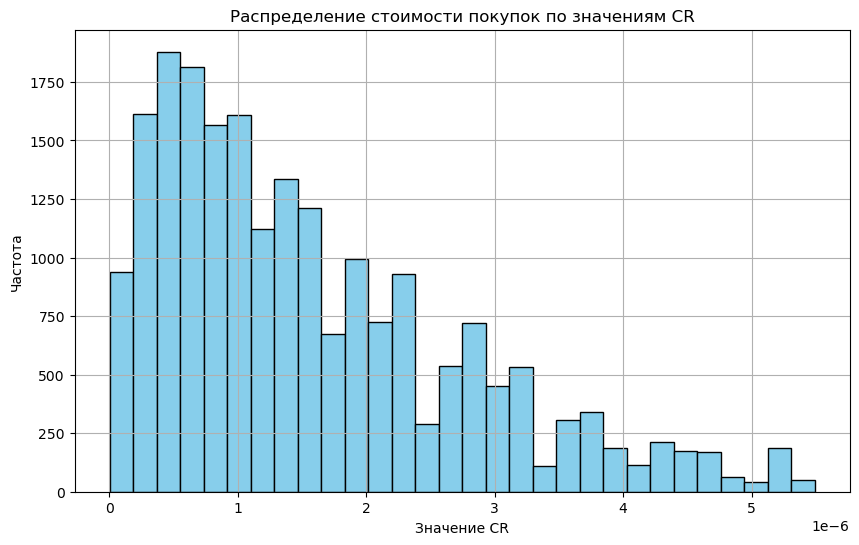

In [80]:
plt.figure(figsize=(10, 6))
plt.hist(cr_frequencies_pos['CR'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Значение CR')
plt.ylabel('Частота')
plt.title('Распределение стоимости покупок по значениям CR')
plt.grid(True)
plt.show()

In [81]:
cr_frequencies_neg = neg_df.sort_values(by='CR').reset_index()
cr_frequencies_neg=cr_frequencies_neg[['cost','CR']]
cr_frequencies_neg

,cost,CR
0,12,5.631526e-09
1,12,5.631526e-09
2,39,1.830246e-08
3,39,1.830246e-08
4,49,2.299540e-08
...,...,...
16315,11699,5.490268e-06
16316,11699,5.490268e-06
16317,11699,5.490268e-06
16318,11699,5.490268e-06


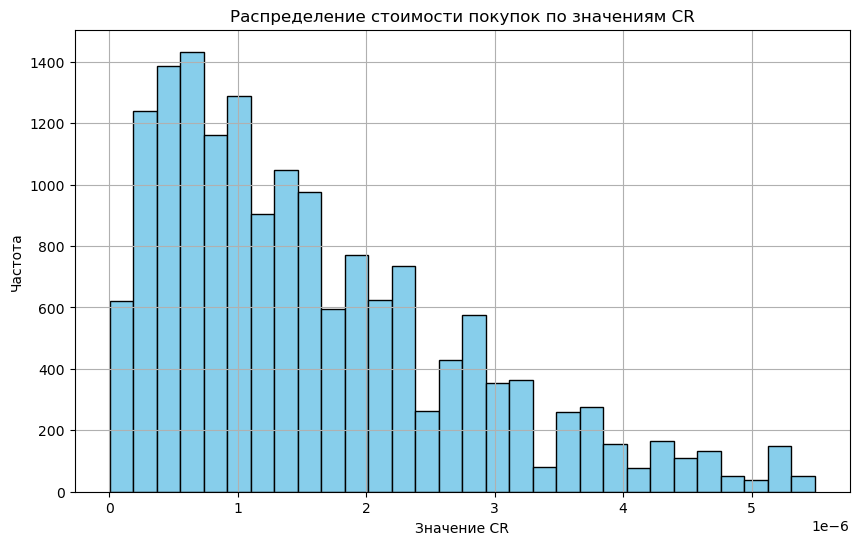

In [82]:
plt.figure(figsize=(10, 6))
plt.hist(cr_frequencies_neg['CR'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Значение CR')
plt.ylabel('Частота')
plt.title('Распределение стоимости покупок по значениям CR')
plt.grid(True)
plt.show()

In [83]:
statistic, p_value = mannwhitneyu(cr_frequencies_neg['cost'], cr_frequencies_pos['cost'])
print("Статистика U:", statistic)
print("p-значение:", p_value)

# Оценка статистической значимости
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница между выборками.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: нет статистически значимой разницы между выборками.")

Статистика U: 173272246.0
p-значение: 0.00837021909074078
Отвергаем нулевую гипотезу: существует статистически значимая разница между выборками.


Метрики: Конверсионная ставка (CR): процент пользователей, совершивших покупку в течение периода кампании.
 Средний чек (AOV): средняя сумма, потраченная за заказ.
 Доход на пользователя (RPU): общий доход, разделенный на количество пользователей.
 Общий доход: сумма всех продаж, сгенерированных в течение периода кампании.

In [84]:
# Расчет метрик для положительной группы
positive_conversion_rate = len(pos_df) / len(ids_pos)
positive_average_order_value = pos_df["cost"].mean()
positive_revenue_per_user = pos_df["cost"].sum() / len(ids_pos)
positive_total_revenue = pos_df["cost"].sum()

In [85]:
# Расчет метрик для отрицательной группы
negative_conversion_rate = len(neg_df) / len(ids_neg)
negative_average_order_value = neg_df["cost"].mean()
negative_revenue_per_user = neg_df["cost"].sum() / len(ids_neg)
negative_total_revenue = neg_df["cost"].sum()


In [86]:
print("Метрики для положительной группы:")
print("Конверсионная ставка (CR):", positive_conversion_rate)
print("Средний чек (AOV):", positive_average_order_value)
print("Доход на пользователя (RPU):", positive_revenue_per_user)
print("Общий доход:", positive_total_revenue)

print("\nМетрики для отрицательной группы:")
print("Конверсионная ставка (CR):", negative_conversion_rate)
print("Средний чек (AOV):", negative_average_order_value)
print("Доход на пользователя (RPU):", negative_revenue_per_user)
print("Общий доход:", negative_total_revenue)

Метрики для положительной группы:
Конверсионная ставка (CR): 4.1812362472494495
Средний чек (AOV): 3333.5393263802507
Доход на пользователя (RPU): 13938.315463092618
Общий доход: 69677639

Метрики для отрицательной группы:
Конверсионная ставка (CR): 3.2653061224489797
Средний чек (AOV): 3380.323529411765
Доход на пользователя (RPU): 11037.791116446579
Общий доход: 55166880


In [87]:
df

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt,CR
1,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,2,0,37,7.034714e-07
2,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,2,0,37,2.252141e-06
3,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,3,0,0,4.317034e-06
4,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,2,0,0,2.346000e-06
5,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Yuma TIF,мультицвет,6999,3,0,1,3.284587e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780112,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Поло мужское Outventure,синий,1599,1,0,24,7.504008e-07
780113,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Babolat Complete Muscle,оранжевый/синий,3899,1,0,24,1.829777e-06
780114,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Protest Prtihiaka,белый/принт,1679,1,1,49,7.879443e-07
780115,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Массажер Demix,темно-зелёный,399,2,0,52,1.872482e-07


In [88]:
df_1134=df[df['city']==1134]

In [89]:
df_1134_1=df_1134[df_1134['dt'].isin([15,45])]
df_1134_2=df_1134[df_1134['dt'].isin([24,52])]

In [90]:
df_1134_2

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt,CR
147,41,1,34,1,1134,32,7.276556,-0.377033,0.833784,0.4304,Кеды детские PUMA Courtflex V2 V PS,черный,1999,3,0,52,9.381184e-07
150,43,1,38,1,1134,32,8.104226,-0.319385,0.879158,0.4304,Чехлы для лезвий коньков Nordway,красный,349,2,0,52,1.637835e-07
471,130,0,63,1,1134,32,5.284831,0.214128,1.501723,0.5072,"Трусы мужские Kappa, 2 штуки",синий/черный,1399,1,0,52,6.565421e-07
708,254,1,28,1,1134,32,7.137098,0.380826,1.017385,0.4304,Крепления для горных лыж Marker Griffon 13 ID;...,черный,8119,2,1,24,3.810197e-06
1042,350,0,44,1,1134,32,5.343162,0.027637,1.014691,0.5072,Кроссовки мужские PUMA Twitch Runner Trail,бежевый/черный,6799,1,1,24,3.190729e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779350,98456,1,35,1,1134,32,7.168927,-0.235014,0.974015,0.4304,Браслет от комаров детский Gardex,желтый,649,3,0,24,3.045717e-07
779439,91966,1,42,1,1134,32,4.816141,0.361014,1.044661,0.5072,Груша настольная Demix Punch ball,черный,999,2,0,24,4.688245e-07
779440,91966,1,42,1,1134,32,4.816141,0.361014,1.044661,0.5072,Кроссовки для девочек FILA Forti,аквамарин,2399,0,1,24,1.125836e-06
779970,119493,1,44,1,1134,32,5.479218,0.240276,1.240165,0.5072,Футболка для девочек Termit,изумрудный,699,0,0,24,3.280364e-07


In [91]:
# Расчет метрик для положительной группы
positive_conversion_rate = len(df_1134_1) / len(df_1134)
positive_average_order_value = df_1134_1["cost"].mean()
positive_revenue_per_user = df_1134_1["cost"].sum() / len(df_1134)
positive_total_revenue = df_1134_1["cost"].sum()
# Расчет метрик для отрицательной группы
negative_conversion_rate = len(df_1134_2) / len(df_1134)
negative_average_order_value = df_1134_2["cost"].mean()
negative_revenue_per_user = df_1134_2["cost"].sum() / len(df_1134)
negative_total_revenue = df_1134_2["cost"].sum()


In [92]:
print("Метрики для положительной группы:")
print("Конверсионная ставка (CR):", positive_conversion_rate)
print("Средний чек (AOV):", positive_average_order_value)
print("Доход на пользователя (RPU):", positive_revenue_per_user)
print("Общий доход:", positive_total_revenue)

print("\nМетрики для отрицательной группы:")
print("Конверсионная ставка (CR):", negative_conversion_rate)
print("Средний чек (AOV):", negative_average_order_value)
print("Доход на пользователя (RPU):", negative_revenue_per_user)
print("Общий доход:", negative_total_revenue)

Метрики для положительной группы:
Конверсионная ставка (CR): 0.055658401130218735
Средний чек (AOV): 3383.5412472647704
Доход на пользователя (RPU): 188.3224959809032
Общий доход: 30925567

Метрики для отрицательной группы:
Конверсионная ставка (CR): 0.03061821016222536
Средний чек (AOV): 3226.8824582338902
Доход на пользователя (RPU): 98.80136527500365
Общий доход: 16224765


In [93]:

cr_frequencies_pos = df_1134_1.sort_values(by='CR').reset_index()
cr_frequencies_pos=cr_frequencies_pos[['cost','CR']]
cr_frequencies_pos

,cost,CR
0,25,1.173235e-08
1,30,1.407881e-08
2,30,1.407881e-08
3,39,1.830246e-08
4,49,2.299540e-08
...,...,...
9135,11699,5.490268e-06
9136,11699,5.490268e-06
9137,11699,5.490268e-06
9138,11699,5.490268e-06


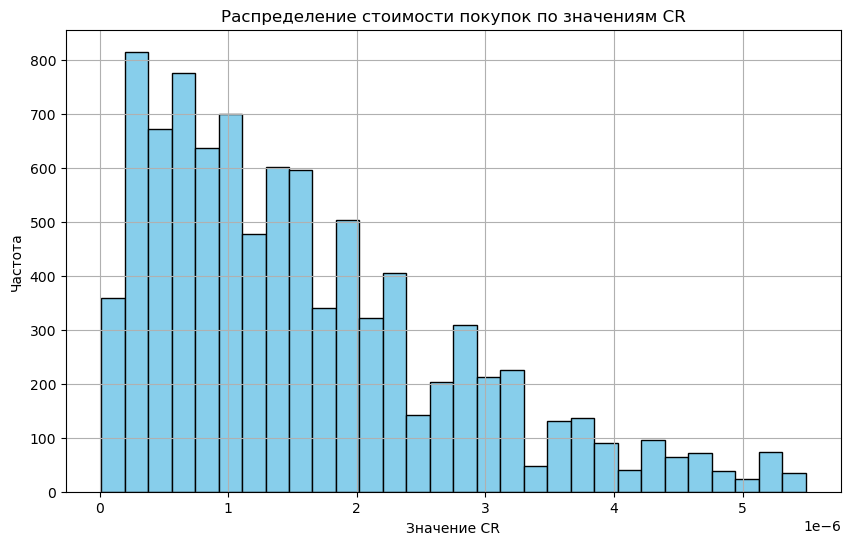

In [94]:
plt.figure(figsize=(10, 6))
plt.hist(cr_frequencies_pos['CR'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Значение CR')
plt.ylabel('Частота')
plt.title('Распределение стоимости покупок по значениям CR')
plt.grid(True)
plt.show()

In [95]:

cr_frequencies_neg = df_1134_2.sort_values(by='CR').reset_index()
cr_frequencies_neg=cr_frequencies_neg[['cost','CR']]
cr_frequencies_neg

,cost,CR
0,30,1.407881e-08
1,49,2.299540e-08
2,63,2.956551e-08
3,69,3.238127e-08
4,69,3.238127e-08
...,...,...
5023,11624,5.455071e-06
5024,11699,5.490268e-06
5025,11699,5.490268e-06
5026,11699,5.490268e-06


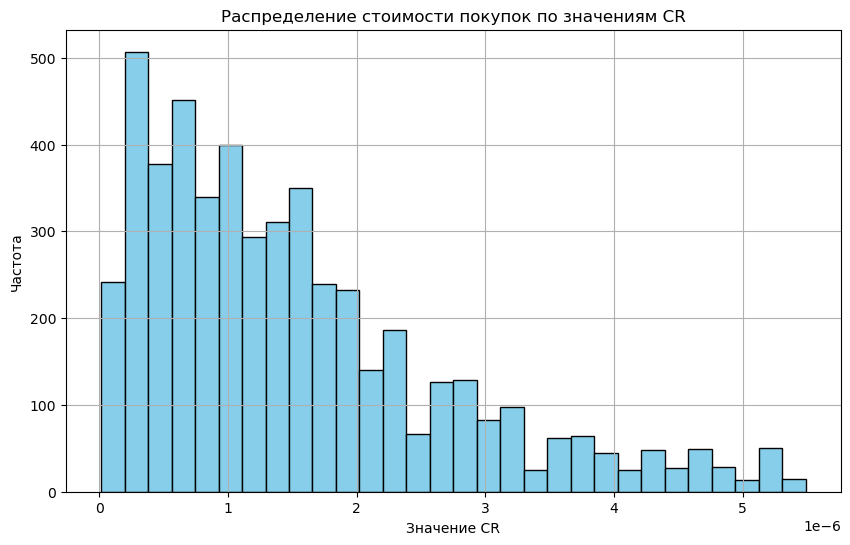

In [96]:
plt.figure(figsize=(10, 6))
plt.hist(cr_frequencies_neg['CR'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Значение CR')
plt.ylabel('Частота')
plt.title('Распределение стоимости покупок по значениям CR')
plt.grid(True)
plt.show()

In [97]:
statistic, p_value = mannwhitneyu(cr_frequencies_neg['cost'], cr_frequencies_pos['cost'])
print("Статистика U:", statistic)
print("p-значение:", p_value)

# Оценка статистической значимости
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница между выборками.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: нет статистически значимой разницы между выборками.")

Статистика U: 21972292.5
p-значение: 1.5763931950134212e-05
Отвергаем нулевую гипотезу: существует статистически значимая разница между выборками.


In [98]:
df.drop(['CR'],axis=1,inplace=True)

C:\Users\Prokofiy\AppData\Local\Temp\ipykernel_12344\1446643567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['CR'],axis=1,inplace=True)


In [99]:
df

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
1,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,2,0,37
2,0,0,36,1,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,2,0,37
3,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,3,0,0
4,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,2,0,0
5,4,0,35,1,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Yuma TIF,мультицвет,6999,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780112,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Поло мужское Outventure,синий,1599,1,0,24
780113,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Babolat Complete Muscle,оранжевый/синий,3899,1,0,24
780114,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Protest Prtihiaka,белый/принт,1679,1,1,49
780115,15885,1,33,1,1190,32,7.321749,0.470877,0.699928,0.4304,Массажер Demix,темно-зелёный,399,2,0,52


In [100]:
random_sample = df.sample(n=100000, random_state=42)

In [101]:
random_sample

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
109119,28977,0,61,1,1178,32,6.031817,-0.248571,1.309000,0.5072,Брюки мужские Columbia Rapid Rivers Pant,серый,3439,1,1,51
192752,51934,1,30,1,1188,32,6.969758,-0.285773,1.093108,0.4304,Замок велосипедный ABUS Catena 6806K/75,синий,4299,2,0,8
385162,103613,0,29,1,1188,32,4.423638,0.174988,1.218755,0.5072,Сандалии женские Skechers D'Lux Walker,черный,3149,0,0,24
285272,77494,1,49,1,1134,32,8.382696,0.099023,1.206561,0.4304,Кроссовки мужские Demix Compact 5,черный,3149,1,1,19
712087,167273,1,38,1,1168,32,5.201284,-0.376200,0.963495,0.5072,Футболка мужская Quiksilver Sunset Logo Flaxton,желтый,849,1,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697184,130110,1,35,1,1188,32,5.424981,0.493496,1.443214,0.5072,Свитшот женский Termit,салатовый,1999,0,0,2
707781,138979,1,55,1,1134,32,8.294610,-0.140131,0.434562,0.4304,Шорты плавательные мужские Joss,черный/зеленый,1259,1,1,32
8048,2256,1,25,0,1202,32,7.177915,-0.311126,1.049417,0.4688,Кеды мужские Reebok Royal Complete Sport,белый,4619,1,1,50
67715,18104,1,39,1,1188,32,7.358662,-0.155767,0.613244,0.4304,Кроссовки мужские 361° Flash,оранжевый/синий/белый,6299,1,1,36


In [102]:
random_sample.to_excel('random_sample.xlsx')

In [103]:
df=df[df['city']==1188].drop(['city','lbt_coef','ac_coef','sm_coef'],axis=1)

In [104]:
df

,id,gender,age,education,country,personal_coef,product,colour,cost,product_sex,base_sale,dt
10,6,1,52,1,32,0.4304,Кроссовки для мальчиков Geox J Sprintye Boy,лимонный/черный,4999,1,0,1
11,6,1,52,1,32,0.4304,Кеды мужские Reebok Royal Complete Cln2,черный,4799,1,1,3
12,6,1,52,1,32,0.4304,Футболка мужская Kappa Authentic Core,темно-синий,999,1,0,8
13,6,1,52,1,32,0.4304,Бейсболка детская Nike Futura Mash Up,синий,1119,3,1,11
14,6,1,52,1,32,0.4304,"Носки детские Demix, 2 пары",синий/серый,299,3,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
780022,18371,1,38,1,32,0.5072,Сабо детские Crocs Classic Clog K,желтый,1999,3,1,22
780023,18371,1,38,1,32,0.5072,Брюки для мальчиков Nike Club,темно-синий,2499,1,0,56
780024,18371,1,38,1,32,0.5072,Сабо детские Crocs Classic Clog K,черный,2729,3,0,57
780060,170390,1,39,1,32,0.4304,Бейсболка Columbia Mesh Snap Back - High,серый,1999,2,0,32


In [105]:
result = df.groupby('id').size().reset_index(name='Counts')

In [106]:
result

,id,Counts
0,6,13
1,18,13
2,39,6
3,40,1
4,53,4
...,...,...
11475,177937,2
11476,177949,12
11477,177995,12
11478,178002,3


In [107]:
merged_df = pd.merge(df, result, on='id', how='left')

In [108]:
merged_df 

,id,gender,age,education,country,personal_coef,product,colour,cost,product_sex,base_sale,dt,Counts
0,6,1,52,1,32,0.4304,Кроссовки для мальчиков Geox J Sprintye Boy,лимонный/черный,4999,1,0,1,13
1,6,1,52,1,32,0.4304,Кеды мужские Reebok Royal Complete Cln2,черный,4799,1,1,3,13
2,6,1,52,1,32,0.4304,Футболка мужская Kappa Authentic Core,темно-синий,999,1,0,8,13
3,6,1,52,1,32,0.4304,Бейсболка детская Nike Futura Mash Up,синий,1119,3,1,11,13
4,6,1,52,1,32,0.4304,"Носки детские Demix, 2 пары",синий/серый,299,3,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76111,18371,1,38,1,32,0.5072,Сабо детские Crocs Classic Clog K,желтый,1999,3,1,22,5
76112,18371,1,38,1,32,0.5072,Брюки для мальчиков Nike Club,темно-синий,2499,1,0,56,5
76113,18371,1,38,1,32,0.5072,Сабо детские Crocs Classic Clog K,черный,2729,3,0,57,5
76114,170390,1,39,1,32,0.4304,Бейсболка Columbia Mesh Snap Back - High,серый,1999,2,0,32,1


In [109]:
merged_df[['Counts']].describe()

,Counts
count,76116.000000
mean,18.755873
std,43.689659
min,1.000000
25%,5.000000
50%,9.000000
75%,18.000000
max,491.000000


In [110]:
#выберем порог на основе среднего значения

In [111]:
def determine_propensity(counts, threshold=18):
    return 1 if counts > threshold else 0


In [112]:
merged_df['propensity_to_buy'] = merged_df['Counts'].apply(determine_propensity)

In [113]:
merged_df.head(100)

,id,gender,age,education,country,personal_coef,product,colour,cost,product_sex,base_sale,dt,Counts,propensity_to_buy
0,6,1,52,1,32,0.4304,Кроссовки для мальчиков Geox J Sprintye Boy,лимонный/черный,4999,1,0,1,13,0
1,6,1,52,1,32,0.4304,Кеды мужские Reebok Royal Complete Cln2,черный,4799,1,1,3,13,0
2,6,1,52,1,32,0.4304,Футболка мужская Kappa Authentic Core,темно-синий,999,1,0,8,13,0
3,6,1,52,1,32,0.4304,Бейсболка детская Nike Futura Mash Up,синий,1119,3,1,11,13,0
4,6,1,52,1,32,0.4304,"Носки детские Demix, 2 пары",синий/серый,299,3,0,11,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,305,0,38,1,32,0.5072,Кеды мужские PUMA Smash V2,черный,7359,1,1,19,21,1
96,305,0,38,1,32,0.5072,Куртка утепленная мужская Demix,сине-зеленый,3999,1,1,19,21,1
97,305,0,38,1,32,0.5072,Кеды мужские Nike Court Legacy Next Nature,черный/белый,8239,1,1,24,21,1
98,305,0,38,1,32,0.5072,Кроссовки мужские Nike Crater Remixa,черный/белый/розовый,7999,1,1,24,21,1


In [118]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76116 entries, 0 to 76115
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 76116 non-null  int64  
 1   gender             76116 non-null  int64  
 2   age                76116 non-null  int64  
 3   education          76116 non-null  int32  
 4   country            76116 non-null  int64  
 5   personal_coef      76116 non-null  float64
 6   product            76116 non-null  object 
 7   colour             76116 non-null  object 
 8   cost               76116 non-null  int64  
 9   product_sex        76116 non-null  int64  
 10  base_sale          76116 non-null  int64  
 11  dt                 76116 non-null  int64  
 12  Counts             76116 non-null  int64  
 13  propensity_to_buy  76116 non-null  int64  
dtypes: float64(1), int32(1), int64(10), object(2)
memory usage: 7.8+ MB


TypeError: Feature names are only supported if all input features have string names, but your input has ['quoted_name', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [131]:

merged_df.to_excel('AcA.xlsx')

object
